In [2]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Analyzing Potential Correlations between Countries with widespread BCG Vaccination policies and cases of COVID-19

I used BCG data from WHO's listing of vaccination by country

I obtained covid-19 cases by country from https://ourworldindata.org/coronavirus-country-by-country.




## WHO Vaccine Dataset


In [8]:
who = pd.read_csv('/content/drive/My Drive/Colab Notebooks/WHO - Vaccine World Coverage.csv')
who.head()

WHO_REGION ISO_code        Cname  ...  Year Percent_covrage  Asterisc
0        EMR      AFG  Afghanistan  ...  1980            33.0       NaN
1        EMR      AFG  Afghanistan  ...  1981             8.0       NaN
2        EMR      AFG  Afghanistan  ...  1982            10.0       NaN
3        EMR      AFG  Afghanistan  ...  1984            11.0       NaN
4        EMR      AFG  Afghanistan  ...  1985            17.0       NaN

[5 rows x 8 columns]

In [9]:
#Get only bcg data
bcg_who = who[who['Vaccine']=='BCG']

#Drop Unnecessary columns
bcg_who = bcg_who.loc[:,['ISO_code','Cname','Year','Percent_covrage']]
bcg_who.head()

#To fill in countries that dont have BCG since 1980, look at all unique ISO codes and fill
iso_codes = who['ISO_code'].unique()
country_names = who['Cname'].unique()
missing_idx = [code not in bcg_who['ISO_code'].unique() for code in iso_codes]
missing_iso = iso_codes[missing_idx]
missing_countries = country_names[missing_idx]

#Print missing countries and iso codes
print('Missing:\n')
for i, c in zip(missing_iso, missing_countries):
  print(i,c)

Missing:

AND Andorra
AUS Australia
BHS Bahamas (the)
BEL Belgium
CAN Canada
CYP Cyprus
DEU Germany
GRD Grenada
ISL Iceland
ITA Italy
LBN Lebanon
NLD Netherlands (the)
SMR San Marino
ESP Spain
SUR Suriname
TTO Trinidad and Tobago
USA United States of America (the)


In [10]:
#Look at the bcg dataset
bcg_who.head()

ISO_code        Cname  Year  Percent_covrage
0      AFG  Afghanistan  1980             33.0
1      AFG  Afghanistan  1981              8.0
2      AFG  Afghanistan  1982             10.0
3      AFG  Afghanistan  1984             11.0
4      AFG  Afghanistan  1985             17.0

In [0]:
#Add missing Data
#Note here I'll set the year to 1979 since the data starts at 1980 - this DOES NOT mean that these coutries stopped nationwide BCG vaccination in 1979, I set it this way to make it easier to filter.
for i, c in zip(missing_iso, missing_countries):
  df = pd.Series({'ISO_code':i,
                     'Cname':c,
                     'Year':1979,
                     'Percent_covrage':np.nan})
  bcg_who = bcg_who.append(df, ignore_index=True)

In [12]:
bcg_who[bcg_who['ISO_code'].isin(missing_iso)]

ISO_code                           Cname  Year  Percent_covrage
5732      AND                         Andorra  1979              NaN
5733      AUS                       Australia  1979              NaN
5734      BHS                   Bahamas (the)  1979              NaN
5735      BEL                         Belgium  1979              NaN
5736      CAN                          Canada  1979              NaN
5737      CYP                          Cyprus  1979              NaN
5738      DEU                         Germany  1979              NaN
5739      GRD                         Grenada  1979              NaN
5740      ISL                         Iceland  1979              NaN
5741      ITA                           Italy  1979              NaN
5742      LBN                         Lebanon  1979              NaN
5743      NLD               Netherlands (the)  1979              NaN
5744      SMR                      San Marino  1979              NaN
5745      ESP                           Spain  1979              NaN
5746      SUR                        Suriname  1979              NaN
5747      TTO             Trinidad and Tobago  1979              NaN
5748      USA  United States of America (the)  1979              NaN

In [13]:
bcg_who.head()

ISO_code        Cname  Year  Percent_covrage
0      AFG  Afghanistan  1980             33.0
1      AFG  Afghanistan  1981              8.0
2      AFG  Afghanistan  1982             10.0
3      AFG  Afghanistan  1984             11.0
4      AFG  Afghanistan  1985             17.0

Now, I want to augment the dataset with the year stopped. This requires looping through each country and seeing the first non nan value backwards from 2018

In [0]:
bcg_who["Year_Stopped"] = 0

for iso in bcg_who['ISO_code'].unique():
  years = bcg_who[bcg_who["ISO_code"] == iso].Year
  idx =  years.index
  bcg_who.loc[idx, "Year_Stopped"] = years.max()

In [15]:
bcg_who.sample(20)

ISO_code                             Cname  ...  Percent_covrage  Year_Stopped
4663      SGP                         Singapore  ...             99.0          2018
1707      SWZ                          Eswatini  ...             94.0          2018
1982      GHA                             Ghana  ...             31.0          2018
3261      FSM  Micronesia (Federated States of)  ...             24.0          2018
5139      TON                             Tonga  ...             99.0          2018
4757      SOM                           Somalia  ...             17.0          2018
666       BGR                          Bulgaria  ...             97.0          2018
5206      TUR                            Turkey  ...             69.0          2018
3519      NPL                             Nepal  ...             67.0          2018
4120      QAT                             Qatar  ...             96.0          2018
1464      DOM          Dominican Republic (the)  ...             88.0          2018
1140      CRI                        Costa Rica  ...             92.0          2018
3419      MMR                           Myanmar  ...             28.0          2018
2197      HTI                             Haiti  ...             59.0          2018
5506      UZB                        Uzbekistan  ...             99.0          2018
3690      NIU                              Niue  ...             99.0          2018
125       AGO                            Angola  ...             61.0          2018
3562      NIC                         Nicaragua  ...             34.0          2018
3499      NRU                             Nauru  ...             90.0          2018
2764      LVA                            Latvia  ...             96.0          2018

[20 rows x 5 columns]

So, now that we've added a column with the year that bcg stopped, we can compare different cutoff dates and see how the mortality ratio of covid correlates to bcg nationwide policies.

Now, I'll import the covid dataset

## Covid Dataset

In [16]:
#Import covid dataset
covid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/owid-covid-data.csv')
covid.head()

iso_code location  ... handwashing_facilities  hospital_beds_per_100k
0      ABW    Aruba  ...                    NaN                     NaN
1      ABW    Aruba  ...                    NaN                     NaN
2      ABW    Aruba  ...                    NaN                     NaN
3      ABW    Aruba  ...                    NaN                     NaN
4      ABW    Aruba  ...                    NaN                     NaN

[5 rows x 29 columns]

In [17]:
#Check the latest available date
latest_date = covid.date.max()
print('Latest Date Available: %s' % (latest_date))

#Check how many locations are available for that date
tot_loc = covid.location.unique()
latest_loc = covid[covid.date == latest_date].location.unique()
print('Total Unique Locations: %i\nLatest Unique Locations: %i' %(len(tot_loc), len(latest_loc)))

#Which locations are not available
locs_not_available = [loc for loc in tot_loc if loc not in latest_loc]
print('Locations not Available for %s: %s'%(latest_date, locs_not_available))

#Unforunately, we want the latest information on spain, so check when that is
spain_latest = covid[covid.location == 'Spain'].date.max()
print('Using %s' %(spain_latest))

covid = covid[covid.date == spain_latest]
covid.head()

Latest Date Available: 2020-05-17
Total Unique Locations: 212
Latest Unique Locations: 209
Locations not Available for 2020-05-17: ['Spain', 'Hong Kong', 'International']
Using 2020-05-16


iso_code     location  ... handwashing_facilities  hospital_beds_per_100k
54       ABW        Aruba  ...                    NaN                     NaN
183      AFG  Afghanistan  ...                 37.746                    0.50
240      AGO       Angola  ...                 26.664                     NaN
292      AIA     Anguilla  ...                    NaN                     NaN
362      ALB      Albania  ...                    NaN                    2.89

[5 rows x 29 columns]

In [18]:
#Filter out columns
covid.index = covid.iso_code #change index to iso_code
cols = ['location','total_cases','total_deaths','aged_65_older','aged_70_older']
covid = covid.loc[:,cols]
covid.head()

location  total_cases  total_deaths  aged_65_older  aged_70_older
iso_code                                                                      
ABW             Aruba          101             3         13.085          7.452
AFG       Afghanistan         6402           168          2.581          1.337
AGO            Angola           48             2          2.405          1.362
AIA          Anguilla            3             0            NaN            NaN
ALB           Albania          916            31         13.188          8.643

In [0]:
#Store all covid isos
covid_iso = covid.index.unique().values

In [20]:
#Check that the covid dataset has more iso codes than the bcg_who dataset
len(covid_iso) > len(bcg_who.ISO_code.unique())

True

In [21]:
#Filter out iso_codes not in the bcg dataset
isos = bcg_who.ISO_code.unique()
covid = covid[covid.index.isin(isos)]

len(covid.index.unique()) == len(bcg_who.ISO_code.unique())

False

In [22]:
#Get which iso codes did not appear in covid but appear in bcg_who
missing_isos = [iso for iso in isos if iso not in covid.index.unique().values]
print("Missing: " + str(missing_isos))

Missing: ['COK', 'PRK', 'KIR', 'MHL', 'FSM', 'NRU', 'NIU', 'PLW', 'WSM', 'SLB', 'TON', 'TKM', 'TUV', 'VUT']


In [23]:
#Add mortality rates
#We're interested in total_deaths/total_cases
covid['mortality'] = covid.total_deaths.values/covid.total_cases.values
covid.head()

location  total_cases  ...  aged_70_older  mortality
iso_code                                     ...                          
AFG                Afghanistan         6402  ...          1.337   0.026242
AGO                     Angola           48  ...          1.362   0.041667
ALB                    Albania          916  ...          8.643   0.033843
AND                    Andorra          761  ...            NaN   0.064389
ARE       United Arab Emirates        21831  ...          0.526   0.009619

[5 rows x 6 columns]

The first analysis I am going to do is to compare covid mortality rates, i.e $\frac{\# Deaths}{\# Cases}$ between countries that have terminated BCG vaccination before the span of years from 1979-2018

In [24]:
#First, I need to add year_stopped and covid data to a joint dataset
bcg_who_temp = bcg_who.copy()
joint = covid.copy()


#I am only interested in the year stopped, so keep only Year stopped and ISO_code and drop any duplicates
bcg_who_temp.index = bcg_who_temp.ISO_code
bcg_who_temp = bcg_who_temp.loc[:,["Year_Stopped"]]
bcg_who_temp = bcg_who_temp.loc[~bcg_who_temp.index.duplicated(keep='first')]
bcg_who_temp.head()

Year_Stopped
ISO_code              
AFG               2018
ALB               2018
DZA               2018
AGO               2018
ATG               1990

In [25]:
#Now add year_stopped to joint
joint["Year_Stopped"] = bcg_who_temp.Year_Stopped
joint.head(15)

location  total_cases  ...  mortality  Year_Stopped
iso_code                                     ...                         
AFG                Afghanistan         6402  ...   0.026242          2018
AGO                     Angola           48  ...   0.041667          2018
ALB                    Albania          916  ...   0.033843          2018
AND                    Andorra          761  ...   0.064389          1979
ARE       United Arab Emirates        21831  ...   0.009619          2018
ARG                  Argentina         7466  ...   0.047683          2018
ARM                    Armenia         4044  ...   0.012859          2018
ATG        Antigua and Barbuda           25  ...   0.120000          1990
AUS                  Australia         7019  ...   0.013962          1979
AUT                    Austria        16068  ...   0.039084          1989
AZE                 Azerbaijan         2980  ...   0.012081          2018
BDI                    Burundi           27  ...   0.037037          2018
BEL                    Belgium        54644  ...   0.163952          1979
BEN                      Benin          339  ...   0.005900          2018
BFA               Burkina Faso          782  ...   0.065217          2018

[15 rows x 7 columns]

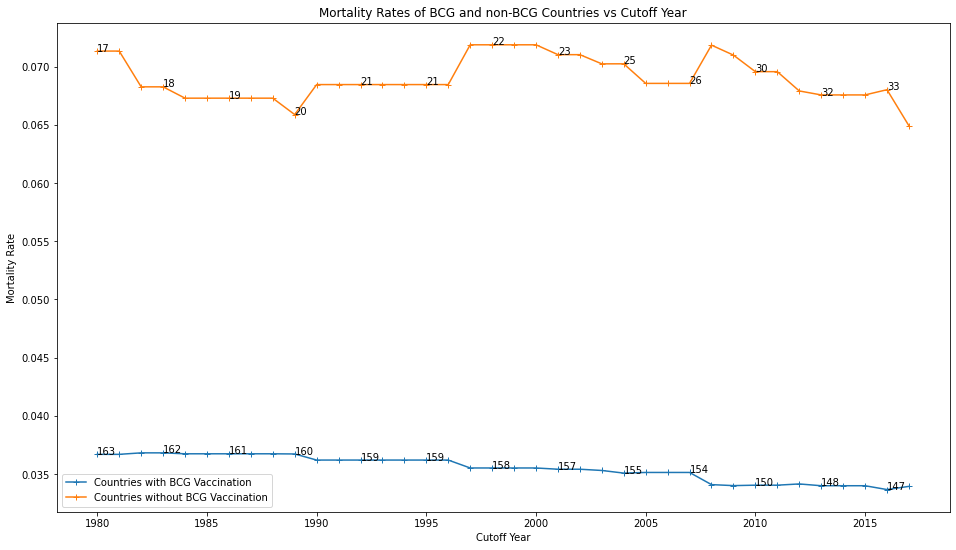

In [26]:
cutoff_years = np.arange(1980,2018)
mortality_no_bcg = []
mortality_bcg = []
size_bcg = []
size_no_bcg = []

for year in cutoff_years:
  #Get no BCG vs yes BCG averages
  yes_bcg_mean = np.mean(joint[joint.Year_Stopped > year].mortality)
  size_bcg.append(len(joint[joint.Year_Stopped > year].mortality))
  size_no_bcg.append(len(joint[joint.Year_Stopped <= year].mortality))
  no_bcg_mean = np.mean(joint[joint.Year_Stopped <=year ].mortality)

  mortality_bcg.append(yes_bcg_mean)
  mortality_no_bcg.append(no_bcg_mean)

fig,ax = plt.subplots()
fig.set_size_inches(16,9)
fig.set_facecolor('w')
ax.plot(cutoff_years, mortality_bcg, marker='+', label='Countries with BCG Vaccination')
ax.plot(cutoff_years, mortality_no_bcg, marker='+', label='Countries without BCG Vaccination')
ax.set_xlabel('Cutoff Year')
ax.set_ylabel('Mortality Rate')
#Label 1/3rd of data points with size of dataset at that point
for i in range(len(cutoff_years)):
  if i%3==0:
    ax.annotate(size_bcg[i], (cutoff_years[i], mortality_bcg[i]))
    ax.annotate(size_no_bcg[i], (cutoff_years[i], mortality_no_bcg[i]))
plt.legend()
plt.title("Mortality Rates of BCG and non-BCG Countries vs Cutoff Year")
plt.savefig('bcg_mortality_vs_cutoff_year.png')
plt.show()



The above graph is a bit confusing, the main takeaway is that countries that have terminated BCG vaccination have a higher mortality rate. It is important to note that the size of the dataset is very different.

No handles with labels found to put in legend.


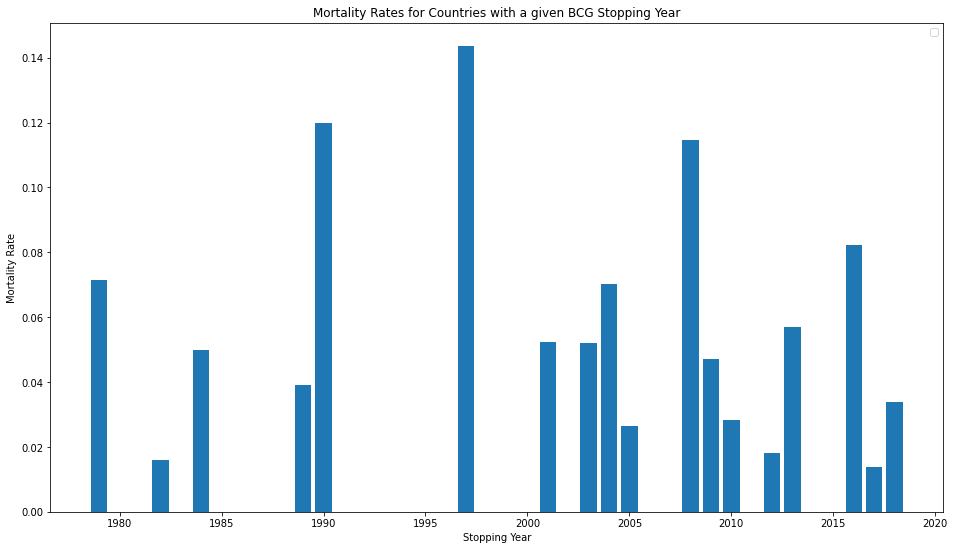

In [27]:
cutoff_years = np.arange(1978,2019)
mortality_no_bcg = []
mortality_bcg = []
size_bcg = []
size_no_bcg = []

for year in cutoff_years:
  mort_mean = np.mean(joint[joint.Year_Stopped == year].mortality)
  mortality_bcg.append(mort_mean)

fig,ax = plt.subplots()
fig.set_size_inches(16,9)
fig.set_facecolor('w')
ax.bar(cutoff_years, mortality_bcg)
ax.set_xlabel('Stopping Year')
ax.set_ylabel('Mortality Rate')
plt.legend()
plt.title("Mortality Rates for Countries with a given BCG Stopping Year")
plt.show()

In [45]:
#Now i want to look at how the coverage affects countries with BCG vaccination in 2018
bcg_covrage = bcg_who[bcg_who.Year == 2018].loc[:,['ISO_code','Percent_covrage']]
bcg_covrage.index = bcg_covrage.ISO_code
bcg_covrage = bcg_covrage.loc[:,["Percent_covrage"]]
bcg_covrage.head()

Percent_covrage
ISO_code                 
AFG                  98.0
ALB                  99.0
DZA                  99.0
AGO                  95.0
ARG                  93.0

In [46]:
#Look at the dataset properties
print(bcg_covrage.Percent_covrage.describe())

print("Number of Countries with Percent Coverage < 90: %i" %(len(np.where(bcg_covrage.Percent_covrage.values < 90)[0])))
print("Number of Countries with Percent Coverage >= 90: %i" %(len(np.where(bcg_covrage.Percent_covrage.values >= 90)[0])))


count    157.000000
mean      90.414013
std       14.429779
min        2.000000
25%       90.000000
50%       95.000000
75%       98.000000
max      100.000000
Name: Percent_covrage, dtype: float64
Number of Countries with Percent Coverage < 90: 38
Number of Countries with Percent Coverage >= 90: 119


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater_equal
  """


In [47]:
#Augment data with covid mortality
bcg_covrage["Mortality"] = covid.mortality
bcg_covrage.head()

Percent_covrage  Mortality
ISO_code                            
AFG                  98.0   0.026242
ALB                  99.0   0.033843
DZA                  99.0   0.080857
AGO                  95.0   0.041667
ARG                  93.0   0.047683

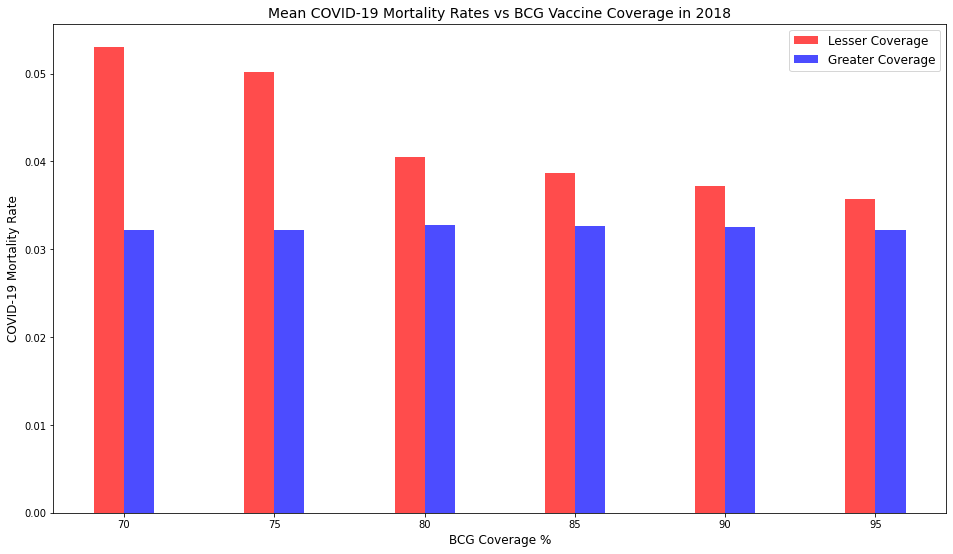

In [99]:
covrage = [70.,75.,80.,85.,90.,95.]

less_covrage = [np.mean(bcg_covrage[bcg_covrage.Percent_covrage < percent].Mortality) for percent in covrage]
more_covrage = [np.mean(bcg_covrage[bcg_covrage.Percent_covrage >= percent].Mortality) for percent in covrage]

fig,ax = plt.subplots()
fig.set_facecolor('w')
fig.set_size_inches(16,9)
ax.bar(np.add(covrage,-0.5), less_covrage, 1 , color='r', alpha=0.70, label='Lesser Coverage')
ax.bar(np.add(covrage,+0.5), more_covrage, 1 , color='b', alpha=0.70, label='Greater Coverage')
ax.set_xlabel('BCG Coverage %', fontsize=12)
ax.set_ylabel('COVID-19 Mortality Rate', fontsize=12)


plt.title('Mean COVID-19 Mortality Rates vs BCG Vaccine Coverage in 2018', fontsize=14)
plt.legend(fontsize=12)
plt.savefig('mortality_vs_bcg_coverage_cumulative.png')
plt.show()


No handles with labels found to put in legend.


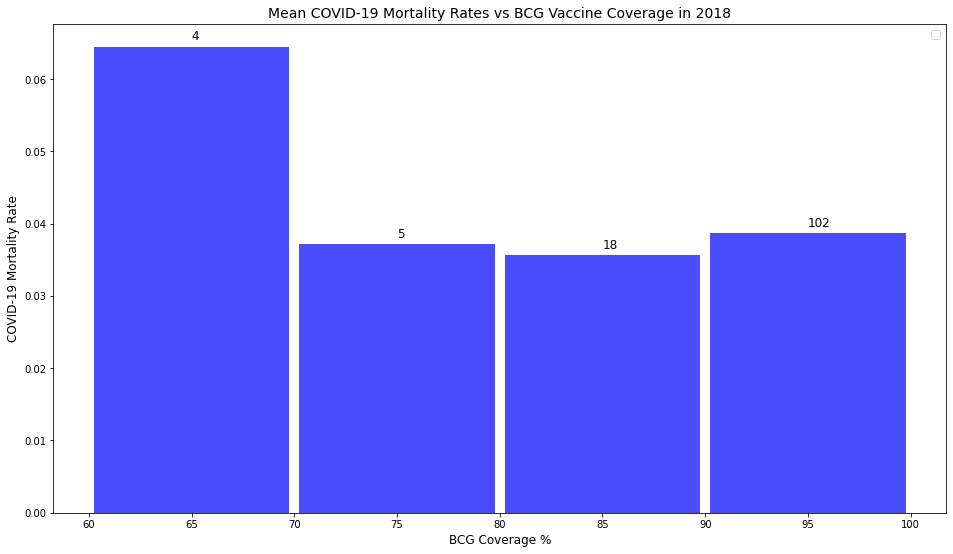

In [104]:
percents = [60.,70.,80.,90.,100.]
coverage = []
sizes = []

for i in range(len(percents)-1):
  mask = (bcg_covrage.Percent_covrage >= percents[i]) & (bcg_covrage.Percent_covrage < percents[i+1]) & (bcg_covrage.Mortality!=0.)
  sizes.append(len(bcg_covrage.loc[mask]))
  coverage.append(np.mean(bcg_covrage.loc[mask].Mortality))

fig,ax = plt.subplots()
fig.set_facecolor('w')
fig.set_size_inches(16,9)
ax.bar(np.add(percents[:-1],5), coverage, 9.5 , color='b', alpha=0.70)
ax.set_xlabel('BCG Coverage %', fontsize=12)
ax.set_ylabel('COVID-19 Mortality Rate', fontsize=12)

for i in range(len(percents[:-1])):
  ax.annotate(sizes[i], (percents[i]+5, coverage[i]+0.001), fontsize=12)
  #ax.annotate(size_no_bcg[i], (cutoff_years[i], mortality_no_bcg[i]))

plt.title('Mean COVID-19 Mortality Rates vs BCG Vaccine Coverage in 2018', fontsize=14)
plt.legend(fontsize=12)
plt.savefig('mortality_vs_bcg_coverage.png')
plt.show()